In [1]:
import os
import pandas as pd
import itertools
import numpy as np
from sklearn import preprocessing as prepro
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
def bayesian_inf(likelihood,prior):
    return (prior*likelihood)/((prior*likelihood)-((1-prior)*(1-likelihood)))

In [3]:
datas = ["peru-data/"+str(i) for i in os.listdir('peru-data')]

Preprocessing data of client


In [4]:
clientAtrDf = pd.read_csv(datas[1],encoding="latin1")

clientAtrDf.dropna(inplace=True)

cliente = list(clientAtrDf["Cliente"])
years = list(clientAtrDf["FechaAltaCliente"].map(lambda x: 2020-int(x[0:4])))
gerencia=list(clientAtrDf["Gerencia"])
tipo=list(clientAtrDf["TipoPoblacion"])

data = zip(cliente,years,gerencia,tipo)

preprocess_client=pd.DataFrame(data,columns=["Cliente","years","gerencia","tipo"])

In [5]:
pk1 = preprocess_client[["Cliente"]]

X  = preprocess_client[list(preprocess_client.columns[1:])]

X_normalized = prepro.normalize(X, norm='l2')

norm_preprocess_client=pd.DataFrame(X_normalized,columns=[list(preprocess_client.columns[1:])])

norm_preprocess_client=pd.concat([pk1,norm_preprocess_client],axis=1)

In [6]:
norm_preprocess_client.columns = ["Cliente","years","gerencia","tipo"]

Preprocessing sale's data

In [7]:
salesDf = pd.read_csv(datas[0],encoding="latin1")
salesDf.dropna(inplace=True)
salesDf.drop(columns=["Año","Hl"],inplace=True)
preproSalesDf = salesDf.reset_index(drop=True)
preproSalesDf=preproSalesDf[["Cliente","Marca","Cupo","Mes" ,"ClaseEnvase","SegmentoPrecio","Nr","Dcto"]]
pk = preproSalesDf[["Cliente","Marca","Cupo","Mes"]]

In [8]:
X  = preproSalesDf[list(preproSalesDf.columns[4:])]

X_normalized = prepro.normalize(X, norm='l2')

norm_preproSalesDf=pd.DataFrame(X_normalized,columns=[list(preproSalesDf.columns[4:])])

norm_preproSalesDf=pd.concat([norm_preproSalesDf,pk], axis=1)

norm_preproSalesDf.rename(columns={norm_preproSalesDf.columns[0]:'envase',	norm_preproSalesDf.columns[1]:'segmento',norm_preproSalesDf.columns[2]:'rev',norm_preproSalesDf.columns[3]:'dcto'},inplace=True)

In [9]:
norm_preproSalesDf

,envase,segmento,rev,dcto,Cliente,Marca,Cupo,Mes
0,0.000315,0.000315,1.000000,0.000000,1,44,10.0,1
1,0.000020,0.000040,1.000000,0.000000,1,18,16.0,1
2,0.000167,0.000084,0.970561,-0.240855,1,2,6.0,6
3,0.000514,0.001029,0.999999,0.000000,1,37,34.0,7
4,0.000123,0.000062,1.000000,0.000000,1,2,16.0,8
...,...,...,...,...,...,...,...,...
1894242,0.000265,0.000529,1.000000,0.000000,15068,44,32.0,8
1894243,0.000159,0.000318,1.000000,0.000000,15069,44,32.0,3
1894244,0.000159,0.000318,1.000000,0.000000,15069,44,32.0,4
1894245,0.000127,0.000064,1.000000,0.000000,15069,2,6.0,4


In [10]:
client_salesComparisonDf =norm_preprocess_client.merge(norm_preproSalesDf,on='Cliente',how='outer')

,Cliente,years,gerencia,tipo,envase,segmento,rev,dcto,Marca,Cupo,Mes
0,1.0,0.463595,0.885044,0.042145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.0,0.462364,0.882696,0.084066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15.0,0.462364,0.882696,0.084066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37.0,0.462364,0.882696,0.084066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43.0,0.462364,0.882696,0.084066,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We need to infer , given client and sales data , what's the ranking order of the type of client.

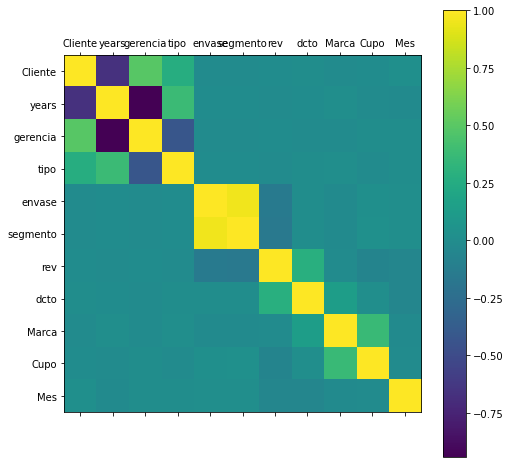

In [11]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.matshow(client_salesComparisonDf.corr())

plt.xticks(range(len(client_salesComparisonDf.columns)), client_salesComparisonDf.columns)
plt.yticks(range(len(client_salesComparisonDf.columns)), client_salesComparisonDf.columns)
plt.colorbar()

plt.show()

The number of years of a client is negative correlated with gerencia. So , using common sense , we can say that the longer a client has been subscribed the more status he has and hence represented with a low value ( i.e Rank 1)

#### Back to the client
Lets again ur data

In [12]:
temp = ((norm_preprocess_client["years"]+norm_preprocess_client["tipo"]).values) #linear combination 

temp = np.floor(temp*100/(temp.max()))

norm_preprocess_client["client_score"]= temp

In [13]:
norm_preprocess_client

,Cliente,years,gerencia,tipo,client_score
0,1,0.463595,0.885044,0.042145,37.0
1,9,0.462364,0.882696,0.084066,40.0
2,15,0.462364,0.882696,0.084066,40.0
3,37,0.462364,0.882696,0.084066,40.0
4,43,0.462364,0.882696,0.084066,40.0
...,...,...,...,...,...
15064,15040,0.061898,0.990375,0.123797,13.0
15065,15043,0.049690,0.993808,0.099381,11.0
15066,15052,0.136083,0.952579,0.272166,30.0
15067,15065,0.047351,0.994379,0.094703,10.0


#### Back to the financials
Lets again our data

In [14]:
temp = (norm_preproSalesDf["rev"].values+0.3*norm_preproSalesDf["dcto"].values)
temp =np.floor((temp*100)//(temp.max()))
norm_preproSalesDf["sales_score"]= temp

In [15]:
norm_preproSalesDf["token"] = norm_preproSalesDf["Cliente"].map(lambda x: str(x)) + norm_preproSalesDf["Marca"].map(lambda x: str(x))+norm_preproSalesDf["Cupo"].map(lambda x: str(x)[:-2])

In [16]:
norm_preproSalesDf

,envase,segmento,rev,dcto,Cliente,Marca,Cupo,Mes,sales_score,token
0,0.000315,0.000315,1.000000,0.000000,1,44,10.0,1,99.0,14410
1,0.000020,0.000040,1.000000,0.000000,1,18,16.0,1,99.0,11816
2,0.000167,0.000084,0.970561,-0.240855,1,2,6.0,6,89.0,126
3,0.000514,0.001029,0.999999,0.000000,1,37,34.0,7,99.0,13734
4,0.000123,0.000062,1.000000,0.000000,1,2,16.0,8,99.0,1216
...,...,...,...,...,...,...,...,...,...,...
1894242,0.000265,0.000529,1.000000,0.000000,15068,44,32.0,8,99.0,150684432
1894243,0.000159,0.000318,1.000000,0.000000,15069,44,32.0,3,99.0,150694432
1894244,0.000159,0.000318,1.000000,0.000000,15069,44,32.0,4,99.0,150694432
1894245,0.000127,0.000064,1.000000,0.000000,15069,2,6.0,4,99.0,1506926


Preprocessing Promos data

In [17]:
executedPromosDf = pd.read_csv(datas[2],encoding="latin1")
active_promosDf  = pd.read_csv(datas[3],encoding="latin1")

In [18]:
executedPromosDf

,CodigoDC,Cliente,Marca,Cupo
0,297601,8410,29,9
1,297601,9337,29,9
2,309843,7404,40,16
3,309874,4017,40,16
4,309910,6316,40,16
...,...,...,...,...
27789,651436,9798,39,20
27790,651588,2397,39,20
27791,651597,4430,40,16
27792,651617,7347,39,20


In [19]:
executedPromosDf["token"] = executedPromosDf["Cliente"].map(lambda x: str(x)) + executedPromosDf["Marca"].map(lambda x: str(x))+executedPromosDf["Cupo"].map(lambda x: str(x))

In [20]:
executedPromosDf["executed"]= "yes"

In [21]:
index_executedPromosDf=executedPromosDf[["token","executed"]]

In [22]:
index_executedPromosDf.dropna(inplace=True)

In [23]:
index_executedPromosDf

,token,executed
0,8410299,yes
1,9337299,yes
2,74044016,yes
3,40174016,yes
4,63164016,yes
...,...,...
27789,97983920,yes
27790,23973920,yes
27791,44304016,yes
27792,73473920,yes


In [24]:
index_executedPromosDf.head(1)

,token,executed
0,8410299,yes


In [25]:
norm_preprocess_client.head(1)

,Cliente,years,gerencia,tipo,client_score
0,1,0.463595,0.885044,0.042145,37.0


In [26]:
norm_preproSalesDf.head(1)

,envase,segmento,rev,dcto,Cliente,Marca,Cupo,Mes,sales_score,token
0,0.000315,0.000315,1.0,0.0,1,44,10.0,1,99.0,14410


In [27]:
index_executedPromosGroupedDf=index_executedPromosDf.groupby("token",as_index=False).count()

In [28]:
consolidatedSalesDf=norm_preproSalesDf.merge(index_executedPromosGroupedDf,on="token",how="outer").fillna(0)

In [29]:
consolidatedSalesDf

,envase,segmento,rev,dcto,Cliente,Marca,Cupo,Mes,sales_score,token,executed
0,0.000315,0.000315,1.000000,0.00000,1.0,44.0,10.0,1.0,99.0,14410,0.0
1,0.000020,0.000040,1.000000,0.00000,1.0,18.0,16.0,1.0,99.0,11816,0.0
2,0.000037,0.000074,0.820978,-0.57096,1.0,18.0,16.0,7.0,64.0,11816,0.0
3,0.000100,0.000199,1.000000,0.00000,1.0,18.0,16.0,11.0,99.0,11816,0.0
4,0.000049,0.000097,1.000000,0.00000,1.0,18.0,16.0,4.0,99.0,11816,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1894413,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,97334016,1.0
1894414,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,98044016,1.0
1894415,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,98734016,1.0
1894416,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,99244016,1.0


In [30]:
consolidatedSalesDf=consolidatedSalesDf[["token","Mes","executed","Cliente","Marca","Cupo","envase","segmento","rev",	 "dcto","sales_score"]]

In [31]:
consolidatedSalesDf=consolidatedSalesDf[consolidatedSalesDf["Cliente"]!=0]

In [32]:
consolidatedSalesDf.head()

,token,Mes,executed,Cliente,Marca,Cupo,envase,segmento,rev,dcto,sales_score
0,14410,1.0,0.0,1.0,44.0,10.0,0.000315,0.000315,1.000000,0.00000,99.0
1,11816,1.0,0.0,1.0,18.0,16.0,0.000020,0.000040,1.000000,0.00000,99.0
2,11816,7.0,0.0,1.0,18.0,16.0,0.000037,0.000074,0.820978,-0.57096,64.0
3,11816,11.0,0.0,1.0,18.0,16.0,0.000100,0.000199,1.000000,0.00000,99.0
4,11816,4.0,0.0,1.0,18.0,16.0,0.000049,0.000097,1.000000,0.00000,99.0


In [33]:
active_promosDf  = pd.read_csv(datas[3],encoding="latin1")

In [34]:
active_promosDf["token"] = active_promosDf["Cliente"].map(lambda x: str(x)) + active_promosDf["Marca"].map(lambda x: str(x))+active_promosDf["Cupo"].map(lambda x: str(x))

In [35]:
active_promosDf

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,token
0,297601,29,9,2018-08-06,2018-08-30,3213,3213299
1,297601,29,9,2018-08-06,2018-08-30,3795,3795299
2,297601,29,9,2018-08-06,2018-08-30,11816,11816299
3,298856,40,16,2018-08-12,2018-08-19,8444,84444016
4,309916,40,16,2018-08-12,2018-08-19,8488,84884016
...,...,...,...,...,...,...,...
422432,688354,40,16,2019-09-25,2019-09-26,14435,144354016
422433,688355,29,9,2019-09-25,2019-09-26,320,320299
422434,688355,29,9,2019-09-25,2019-09-26,3117,3117299
422435,688355,29,9,2019-09-25,2019-09-26,3503,3503299


In [36]:
executedPromosDf.merge(active_promosDf,on="CodigoDC",how="outer")

,CodigoDC,Cliente_x,Marca_x,Cupo_x,token_x,executed,Marca_y,Cupo_y,Fecha_Desde,Fecha_Hasta,Cliente_y,token_y
0,297601,8410.0,29.0,9.0,8410299,yes,29,9,2018-08-06,2018-08-30,3213,3213299
1,297601,8410.0,29.0,9.0,8410299,yes,29,9,2018-08-06,2018-08-30,3795,3795299
2,297601,8410.0,29.0,9.0,8410299,yes,29,9,2018-08-06,2018-08-30,11816,11816299
3,297601,8410.0,29.0,9.0,8410299,yes,29,9,2018-08-06,2018-08-30,6106,6106299
4,297601,8410.0,29.0,9.0,8410299,yes,29,9,2018-08-06,2018-08-30,8157,8157299
...,...,...,...,...,...,...,...,...,...,...,...,...
9686334,687322,NaN,NaN,NaN,NaN,NaN,40,16,2019-09-22,2019-09-22,9774,97744016
9686335,687694,NaN,NaN,NaN,NaN,NaN,39,20,2019-09-22,2019-09-22,8584,85843920
9686336,687694,NaN,NaN,NaN,NaN,NaN,40,16,2019-09-22,2019-09-22,8584,85844016
9686337,687704,NaN,NaN,NaN,NaN,NaN,39,20,2019-09-22,2019-09-22,2632,26323920


In [37]:
consolidatedSalesDf.head()

,token,Mes,executed,Cliente,Marca,Cupo,envase,segmento,rev,dcto,sales_score
0,14410,1.0,0.0,1.0,44.0,10.0,0.000315,0.000315,1.000000,0.00000,99.0
1,11816,1.0,0.0,1.0,18.0,16.0,0.000020,0.000040,1.000000,0.00000,99.0
2,11816,7.0,0.0,1.0,18.0,16.0,0.000037,0.000074,0.820978,-0.57096,64.0
3,11816,11.0,0.0,1.0,18.0,16.0,0.000100,0.000199,1.000000,0.00000,99.0
4,11816,4.0,0.0,1.0,18.0,16.0,0.000049,0.000097,1.000000,0.00000,99.0


In [38]:
temp = consolidatedSalesDf["executed"].values
temp = np.floor(temp*100/temp.max())
consolidatedSalesDf["promo_score"] = temp

In [39]:
consolidatedDf = norm_preprocess_client.merge(consolidatedSalesDf,on="Cliente",how="inner")

In [40]:
consolidatedDf=consolidatedDf.drop(columns=["years","executed","gerencia","tipo","segmento","envase","rev","dcto"],inplace=False)

In [41]:
temp = (consolidatedDf["promo_score"].values/100) * (consolidatedDf["sales_score"].values/100) *((consolidatedDf["client_score"].values/100) ) 

consolidatedDf["prob"]=temp

In [42]:
temp2=consolidatedDf[consolidatedDf["prob"]!=0]

In [43]:
temp2 = temp2.reset_index(drop=True)

In [44]:
temp2

,Cliente,client_score,token,Mes,Marca,Cupo,sales_score,promo_score,prob
0,1,37.0,14016,2.0,40.0,16.0,99.0,5.0,0.018315
1,1,37.0,14016,8.0,40.0,16.0,99.0,5.0,0.018315
2,1,37.0,14016,1.0,40.0,16.0,99.0,5.0,0.018315
3,1,37.0,14016,3.0,40.0,16.0,99.0,5.0,0.018315
4,1,37.0,14016,11.0,40.0,16.0,94.0,5.0,0.017390
...,...,...,...,...,...,...,...,...,...
109716,14991,27.0,149914016,7.0,40.0,16.0,99.0,11.0,0.029403
109717,14991,27.0,149914016,4.0,40.0,16.0,99.0,11.0,0.029403
109718,14991,27.0,149914016,5.0,40.0,16.0,99.0,11.0,0.029403
109719,14991,27.0,149914016,6.0,40.0,16.0,97.0,11.0,0.028809


In [45]:
temp3 = temp2.sort_values(by=["Cliente","Mes"]).reset_index(drop=True)

In [46]:
likelihood_ini=temp3["prob"].max()

In [47]:
lista = []
for token in pd.unique(temp3["token"]):
    likelihood = likelihood_ini
    probs = list(temp3[temp3["token"]==token]["prob"])

    for p_aplica in probs:
        temp=bayesian_inf(likelihood,p_aplica)
        likelihood = temp

    lista.append([temp,token])

In [48]:
max(lista)

[1.9811599530368715, '50334016']

In [49]:
cons = temp2.groupby("token",as_index=False).mean()
cons["prob"]=cons["prob"].values-cons["prob"].min()

In [50]:
cons=cons.sort_values(by="prob").reset_index(drop=True)

In [51]:
cons[cons["token"]=="104016"]

,token,Cliente,client_score,Mes,Marca,Cupo,sales_score,promo_score,prob
3545,104016,10,40.0,7.0,40.0,16.0,74.666667,11.0,0.060214


In [79]:
test=pd.read_csv("test.csv")

In [80]:
test["token"] = test["Cliente"].map(lambda x: str(x)) + test["Marca"].map(lambda x: str(x))+test["Cupo"].map(lambda x: str(x))

In [81]:
testm = test.merge(cons,on="token",how="outer") 

In [82]:
output=testm[["Cliente_x","Marca_x","Cupo_x","prob"]]

In [83]:
output.columns = ["Cliente","Marca","Cupo","Ejecuto_Promo"]

In [91]:
output["Ejecuto_Promo"].fillna("0",inplace=True)

In [93]:
output2 = output.dropna()

In [95]:
output2.to_csv("output.csv",index=False)

In [98]:
len(test)

16866

In [108]:
C=output2["Cliente"].astype("int")
M=output2["Marca"].astype("int")
CU=output2["Cupo"].astype("int")

In [109]:
output2["C"] = C

In [111]:
output2["M"] = M

In [112]:
output2["CU"] = CU

In [119]:
algo  = output2[["C","M","CU","Ejecuto_Promo"]]

In [121]:
algo.columns=["Cliente","Marca","Cupo","Ejecuto_Promo"]

In [123]:
algo.to_csv("output.csv",index=False)